## Predictive modelling 
### Week 2: Linear regression

In [1]:
# libraries
import pandas as pd # process dataframe
import numpy as np # scientific calculation
import seaborn as sns # visualization complete stastistics
import matplotlib.pyplot as plt # visualization

import statsmodels.api as sm # statsmodels to build regression model

### 0. Load training dataset: Used Cars Price Prediction from Kaggle
https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction

In [2]:
data = pd.read_csv('../cars_dataset/train-data.csv')
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 1. Processing predictor and target variables
This week, we will choose to work with more varibles. Let's select all of the numeric variables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


Some processing tasks to convert strings to numeric values

In [4]:
train_0 = data.drop(columns=['Unnamed: 0', 'Location', 'Year', 'Fuel_Type',
                              'Transmission', 'Owner_Type', 'New_Price'])
train_0 = train_0.copy()

## Strings to float transformation
train_0['Mileage'] = train_0['Mileage']\
    .str.replace('km/kg','').str.replace('kmpl','').astype(float)
train_0['Engine'] = train_0['Engine'].str.replace('CC','').astype(float)
train_0['Power'] = train_0['Power']\
    .str.replace('bhp','').str.replace('null', '0').fillna('0').astype(float)

# check description statistics
display(train_0.describe())

# find missing values
display(train_0.isnull().sum())

# display top 5 rows
display(train_0.head())

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6.019000e+03,6017.000000,5983.000000,6019.000000,5977.000000,6019.000000
mean,5.873838e+04,18.134961,1621.276450,110.562372,5.278735,9.479468
std,9.126884e+04,4.582289,601.355233,55.956041,0.808840,11.187917
min,1.710000e+02,0.000000,72.000000,0.000000,0.000000,0.440000
25%,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,5.300000e+04,18.150000,1493.000000,91.100000,5.000000,5.640000
75%,7.300000e+04,21.100000,1984.000000,138.030000,5.000000,9.950000
max,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Name                  0
Kilometers_Driven     0
Mileage               2
Engine               36
Power                 0
Seats                42
Price                 0
dtype: int64

,Name,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,72000,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,41000,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,46000,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,87000,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,40670,15.20,1968.0,140.80,5.0,17.74


For the ease of learning, we will exclude rows with missing data for now.

In [5]:
train_0_nomissing = train_0.dropna()

# find missing values
display(train_0_nomissing.isnull().sum())

Name                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Let's split training and test sets here, so that we are not going to see the unseen during the model development step.

In [6]:
from sklearn.model_selection import train_test_split 

# perform train test split 
X_all = train_0_nomissing.drop(columns=['Price'])
y_all = train_0_nomissing['Price']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size=0.3, 
                                                    random_state=42)

# check data size 
print('Training set size: ', len(X_train)) # 70% of total data
print('Test set size: ', len(X_test)) # 30% of total data

Training set size:  4182
Test set size:  1793


### 2. Exploring the correlation
Here are the steps of exploring correlation
1. We could do a pairplot to see the relationships among variables
2. We could calculate correlations and display it as a correlation heatmap

#### Pairplot
Let combine X train and Y train together to evaluate relationships among variables

In [14]:
train

,Name,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
5333,Maruti Ertiga VDI,63001,20.77,1248.0,88.76,7.0,6.11
1822,Mahindra KUV 100 mFALCON D75 K4 Plus 5str,10500,25.32,1198.0,77.00,5.0,4.70
2638,Maruti Wagon R LXI CNG,90400,26.20,998.0,58.20,5.0,2.90
2931,Honda Amaze S i-Vtech,42000,18.00,1198.0,86.70,5.0,4.30
5151,Volkswagen Polo Diesel Comfortline 1.2L,107023,22.07,1199.0,73.90,5.0,3.90
...,...,...,...,...,...,...,...
3799,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,30000,14.21,2143.0,203.00,5.0,26.00
5233,Maruti Ritz VDI (ABS) BS IV,75000,23.20,1248.0,73.94,5.0,4.90
5268,Hyundai i20 Asta,28000,17.00,1197.0,80.00,5.0,2.65
5433,Hyundai i10 Era,34952,19.81,1086.0,68.05,5.0,4.01


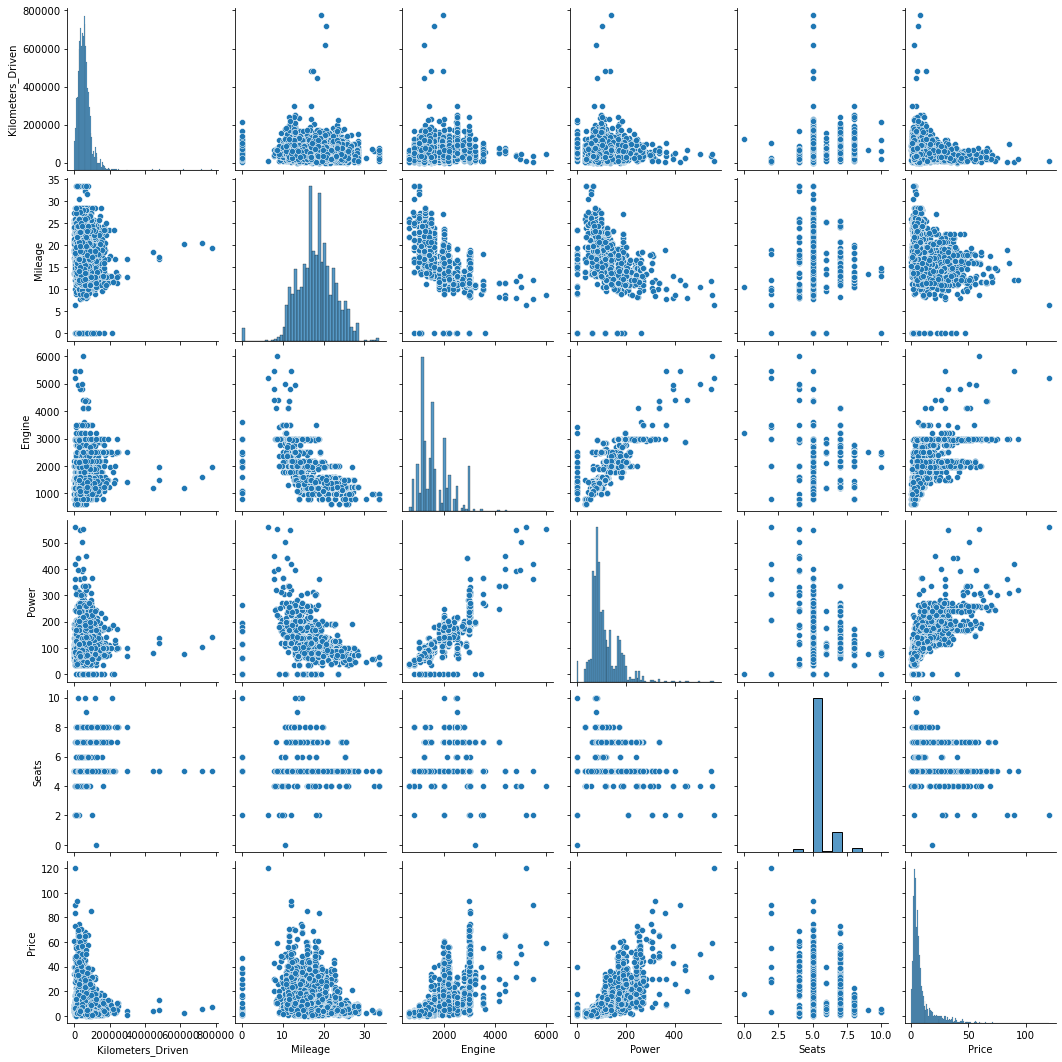

In [7]:
# 1. Pairplot 
train = pd.concat([X_train, y_train], axis=1)

sns.pairplot(train.drop(columns=['Name']));

#### Correlation plot

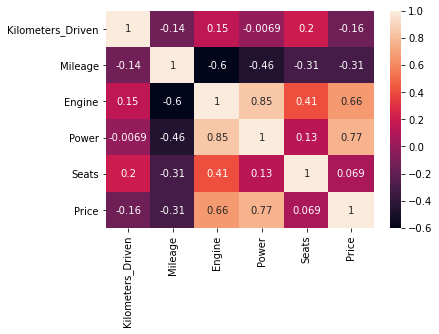

In [8]:
# heatmap for all variables
corr_df = train.corr()
sns.heatmap(corr_df, annot=True);


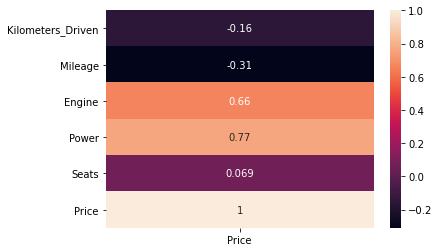

In [9]:
# heatmap for price in particular
corr_df = train.corr()
sns.heatmap(corr_df[['Price']], annot=True);


### 3. Multiple regression modelling
We will try out the case that we add more than one predictor to our model.
The framework is to compare between the model with single predictor (highest correlation) and the model with multiple predictors. The test RMSE will be used as as evaluation metrics. 

Let's create a function to display the results

In [10]:
from sklearn.metrics import mean_squared_error

def regression_model(X_train, y_train, X_test, y_test):
    # train model
    X = X_train
    X = sm.add_constant(X)
    y = y_train
    
    lr = sm.OLS(y, X).fit()
    display(lr.summary())
    
    # get rmse for the trained model
    trn_pred = lr.predict(X)
    print('Training RMSE: ', mean_squared_error(y_train, trn_pred, squared=False))
    
    # predict on the unseen data
    X = X_test
    X = sm.add_constant(X)
    tst_pred = lr.predict(X)
    print('Test RMSE: ', mean_squared_error(y_test, tst_pred, squared=False))
    

#### Case I Using Power as a predictor

In [11]:
regression_model(X_train['Power'], 
                 y_train, 
                 X_test['Power'], 
                 y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     5917.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:21:13   Log-Likelihood:                -13984.
No. Observations:                4182   AIC:                         2.797e+04
Df Residuals:                    4180   BIC:                         2.798e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9764      0.238    -29.293      0.000      -7.443      -6.509
Power          0.1472      0.002     76.921      0.000       0.143       0.151
==============================================================================
Omnibus:                     1604.342   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17193.871
Skew:                           1.520   Prob(JB):                         0.00
Kurtosis:                      12.457   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Training RMSE:  6.854348662724233
Test RMSE:  8.230711763951316


#### Case II variables with positive correlation as predictors

In [12]:
regression_model(X_train[['Engine', 'Power', 'Seats']], 
                 y_train, 
                 X_test[['Engine', 'Power', 'Seats']], 
                 y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     2005.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:21:13   Log-Likelihood:                -13963.
No. Observations:                4182   AIC:                         2.793e+04
Df Residuals:                    4178   BIC:                         2.796e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6196      0.746     -4.850      0.000      -5.083      -2.156
Engine         0.0023      0.000      5.719      0.000       0.001       0.003
Power          0.1281      0.004     32.194      0.000       0.120       0.136
Seats         -0.9313      0.161     -5.792      0.000      -1.247      -0.616
==============================================================================
Omnibus:                     1511.584   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16379.237
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                      12.278   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training RMSE:  6.819909687638772
Test RMSE:  8.171376354989615


### 4. Homework
As you may see, our models are a bit overfitting from the reality. Should we try to tweak the model accuracy a bit? You will be delivering the following tasks. 

1. Explore the test partitioned data (test set in this notebook). You could create both pairplot and correlation plot to investigate the relationship. 
2. Once getting insights from the test set, now trying to improve the model using the training set. Find the suitable combination of predictors. You are also open to delete outliers if needed.
3. If you are confident and validate the model using test RMSE, you also need to retrain the model using all data (6xxx rows). This all data will be the entire training set. Get the model parameters and apply them to the unseen data called 'test-data-mod.csv'. Get predictions as export it as csv. We will see who gets the best results next time.

In [13]:
# this is the unseen set
unseen_data = pd.read_csv('../cars_dataset/test-data-mod.csv')
unseen_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
1,30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0
2,36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0
3,39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0
4,43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1209,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0
178,1212,Ford EcoSport 1.5 Petrol Ambiente,Kochi,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0
179,1213,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0
180,1216,Maruti Vitara Brezza ZDi,Kochi,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0


In [20]:
# sample submission format
sample_sub = pd.DataFrame({'y_pred': np.random.randint(5, 24, 182)})
sample_sub 

,y_pred
0,13
1,11
2,15
3,7
4,20
...,...
177,8
178,10
179,11
180,19
